In [1]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url)

/home/anggi/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df[['city08', 'highway08']]

In [5]:
df = df.rename(columns={'city08': 'city',
                   'highway08': 'highway'})

In [7]:
#indexing 
df.mean(axis=1) #axis=1 means columnwise (city + highway) / 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [8]:
df.mean(axis=0) #axis=1 rowwise

city       18.369045
highway    24.504667
dtype: float64

***

In [9]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [10]:
df.head()

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8


In [11]:
#Chaining
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        
        return (df_.astype({col:'uint8' for col in cols}))
    
    return (df
            .rename(columns={'Seq.': 'Seq'})
            .rename(columns={k:v.replace(' ', '_') for k, v in 
                             {'Bg': 'Background', 
                              'PL ': ' Party leadership ', 'CAb ': ' Communication ability ' ,
                              'RC ': ' Relations with Congress ', 'CAp ': ' Court appointments ' ,
                              'HE ': ' Handling of economy ', 'L ': 'Luck ' ,
                              'AC ': ' Ability to compromise ', 'WR ': ' Willing to take risks ' ,
                              'EAp ': ' Executive appointments ', 'OA ': ' Overall ability ' ,
                              'Im ': ' Imagination ', 'DA ': ' Domestic accomplishments ' ,
                              'Int ': ' Integrity ', 'EAb ': ' Executive ability ' ,
                              'FPA ': ' Foreign policy accomplishments ' ,
                              'LA ': ' Leadership ability ',
                              'IQ ': ' Intelligence ', 'AM ': ' Avoid crucial mistakes ' ,
                              'EV ': " Experts ' view ", 'O ': ' Overall '}.items()})
            .astype({'Party': 'category'})
            .pipe(int64_to_uint8)
            .assign(Average_rank=lambda df_: (df_.select_dtypes('uint8').sum(axis=1).rank(method='dense').astype('uint8')),
                    Quartile=lambda df_: pd.qcut(df_.Average_rank, 4, labels='1st 2nd 3rd 4th'.split())))

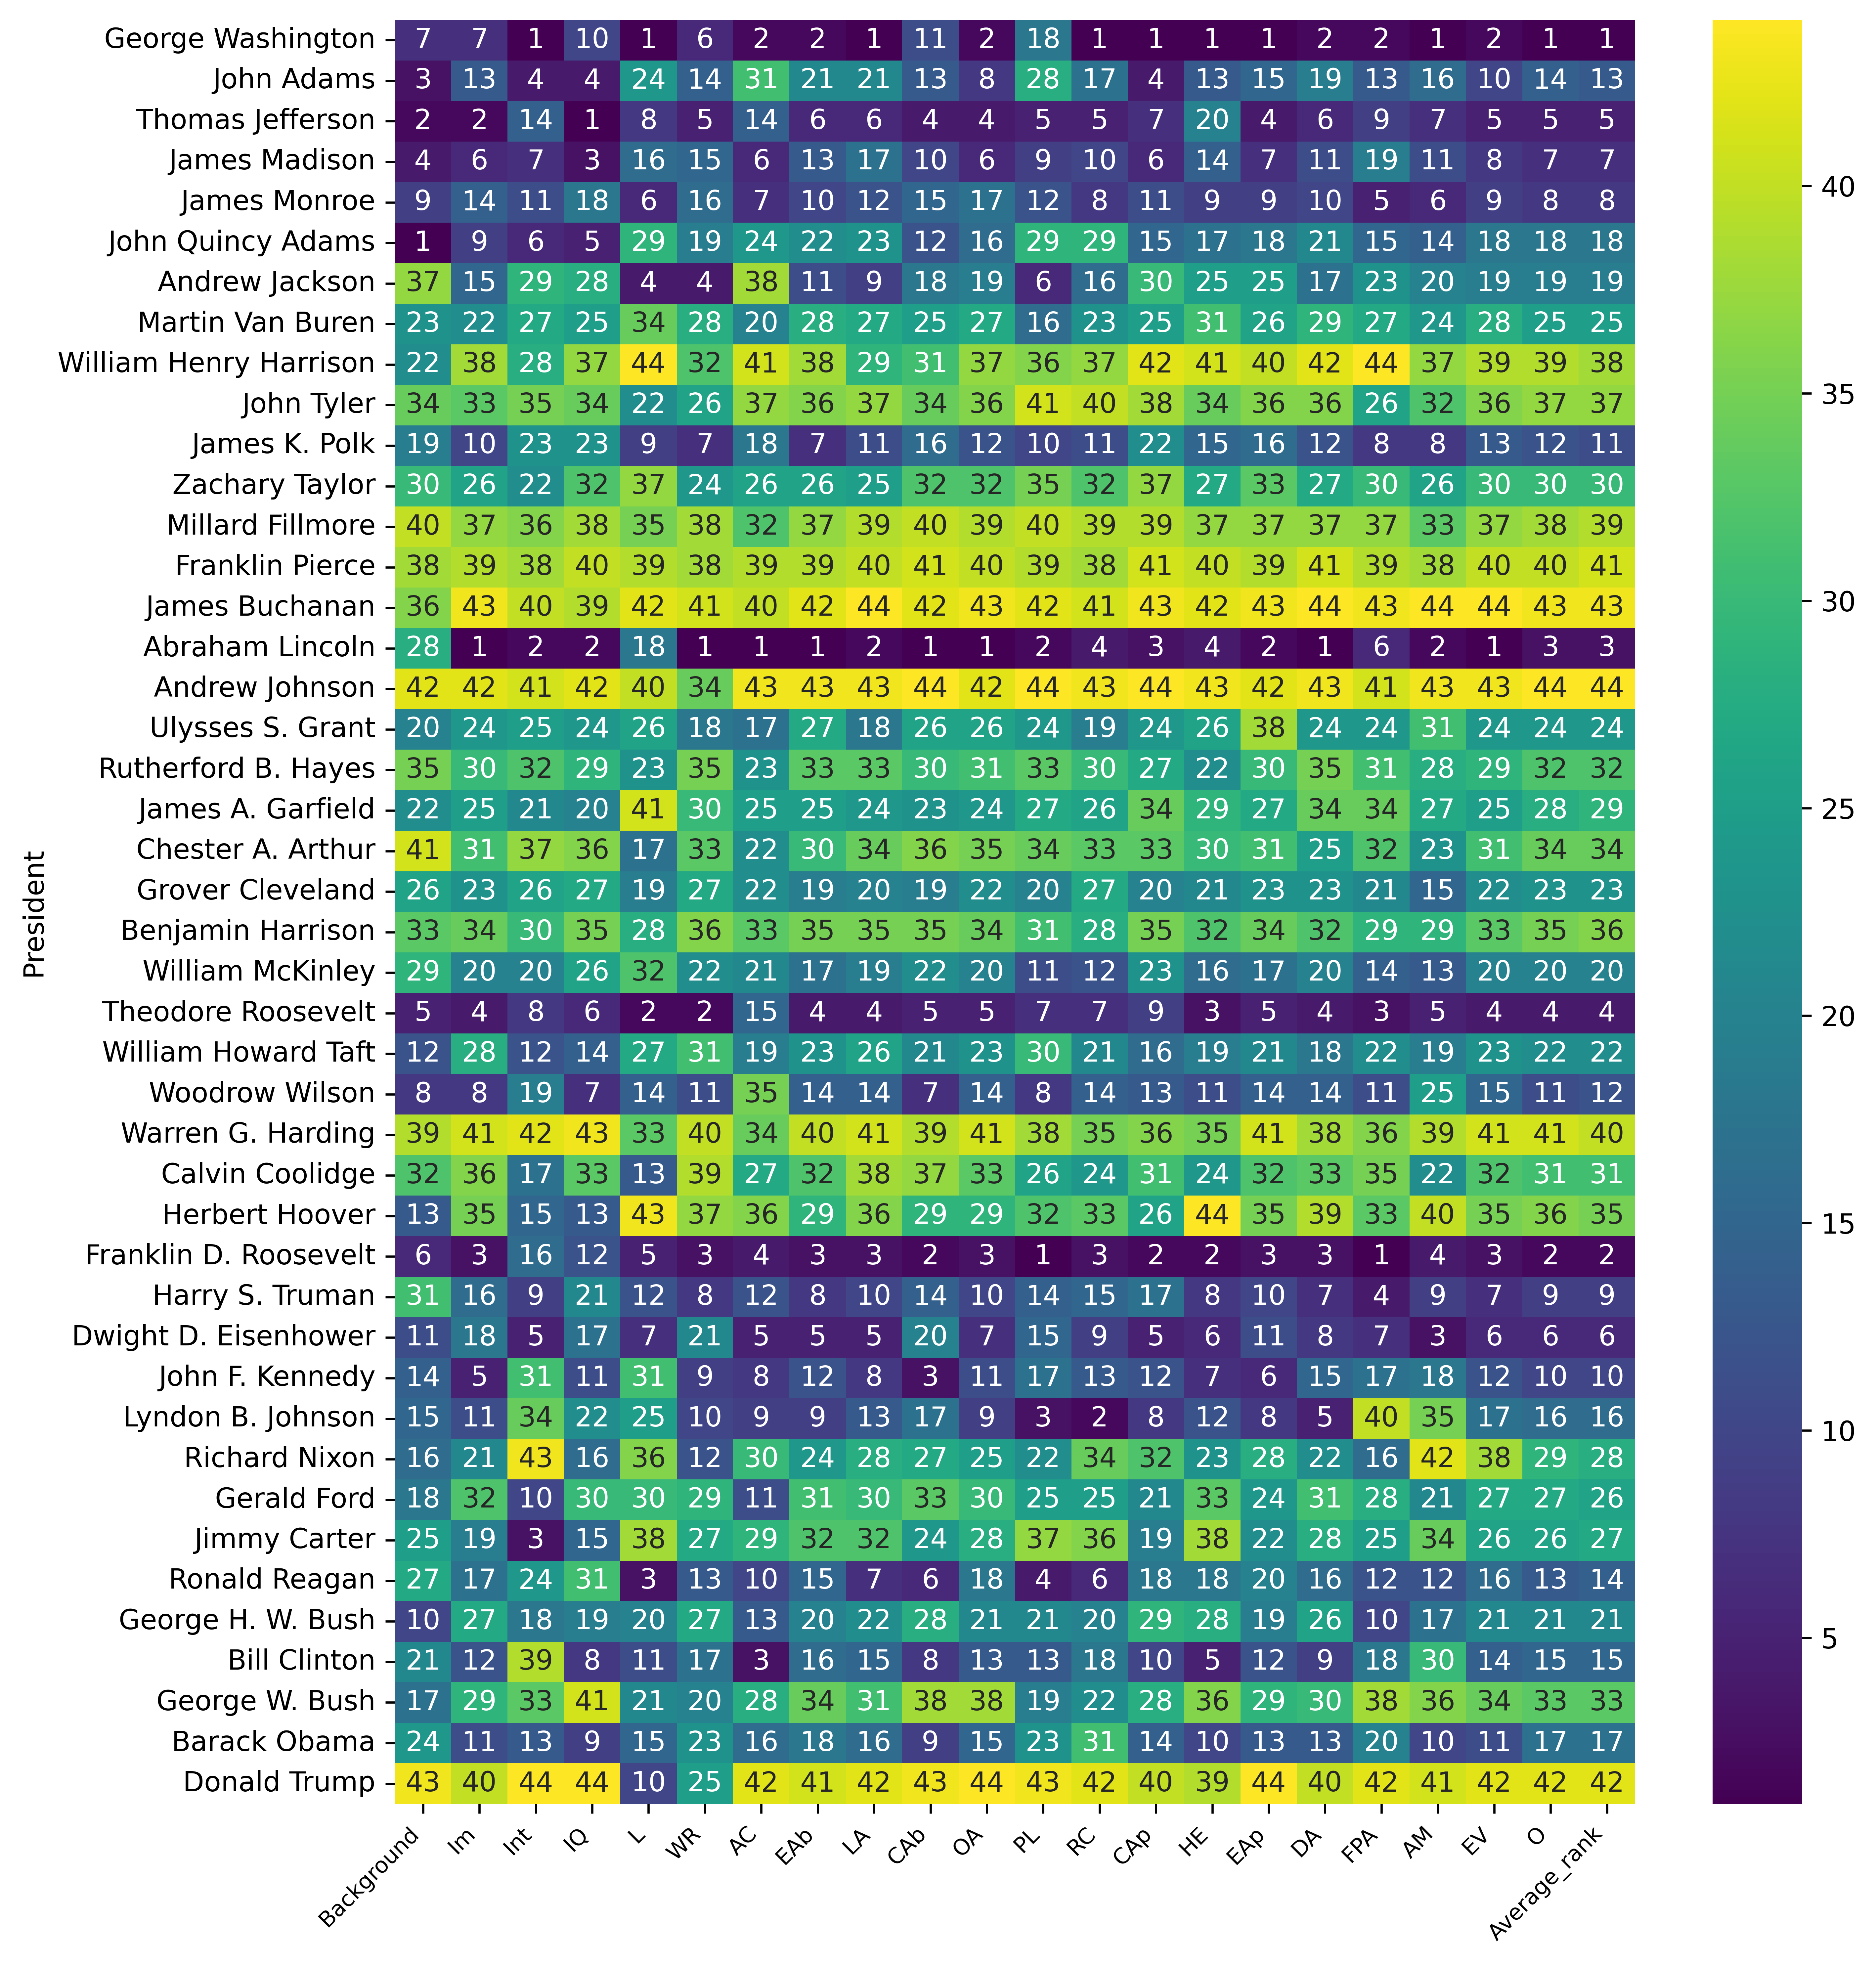

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10), dpi=600)
g = sns.heatmap(data=(tweak_siena_pres(df).set_index('President').iloc[:, 2:-1]),
                annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), 
                  rotation=45, fontsize=8, 
                  ha='right')
fig.tight_layout()